## DSGA1007 - Final Project
## Title: A Data Science Approach to Gender Representation in Film

#### Group Members: Elizabeth Combs (eac721), Lauren D'Arinzo (lhd258), Amber Teng (at2507 - responsible)
#### http://imdbgenderrepresentation.getforge.io/

“Regardless of the content, a film has the power to shape perceptions of moviegoers on a range of subjects from love and marriage to the work of the government” - cf. Franklin  2006 ; Kolker  1999 ; Ortega-Liston  2000 ; Riggle, Ellis, and Crawford  1996 

#### Abstract
The Bechdel test is a blunt, basic measure of gender equality in fictional media. From a data science perspective, we wondered if and how we could automate the process of scoring a film based on the Bechdel criteria. This project aims to complete a descriptive analysis to assess the potential of creating such a method. We review the possibility through Tableau visualization dashboards to compare the number of movies scored and the ratio of passing movies over time. We subsequently examine the use of word count as a potential proxy to quantify the words spoken by women in a film. In our conclusion, we address the modeling and ethical implications of quantifying cultural variables for feature engineering. This Notebook serves to clean the data for our project as well as complete first exploratory data visualizations. 

#### Background

##### Description and Motivation: 
An integral part of data science is the communication of results; visualizations make it easier to present and discuss data, detect patterns, and identify significant points in a dataset.  As data scientists, it is important that we make these visualizations accessible and interpretable by our population of interest. 

In the age of technology and media, our group sought to better understand how women have, and continue to be represented in films, particularly those rated by both users and critics. For this exploration, we utilize the Bechdel Test, which is a measure of the representation of women in fiction. The test is comprised of three criteria: a movie or work of fiction has to (1) have at least two women in it, (2) who talk to each other, and (3) have a conversation that revolves around a topic other than a man. The test has historically been used as an indicator for the “active presence of women” in a work of fiction, and in the field of media studies, to shed light on gender inequality in works of fiction [1]. However, from the website documentation, the scoring regimen appears to be a largely manual process -- you have to watch the movie to do it. Consequently, we were motivated to consider ways that the Bechdel Test could be made more efficient through automation, while using compelling visualizations along the way to support our resulting conclusions.

##### Data Source:
BechdelTest.com sources API to query their list of movies that have been scored on the test criteria [2]. Their data include a unique IMDb movie ID for each film, allowing us to link the Bechdel data to public movie data from IMDb that includes further information about the title, like genre and the average rating by IMDb users. We also utilize Polygraph's Film Dialogue Dataset which contains information from movie scripts about the number of words spoken by each character, as well as the available demographic information on that character. We suspect that some of the fields, like age, make be estimates, but consider the gender feature to be largely reliable. 

##### [Merging Datasets](#mergingdatasets_cell)

We merge data from three different sources: 
- (1) Bechdel (http://bechdeltest.com/api/v1/getAllMovies)
- (2) Scripts (https://github.com/matthewfdaniels/scripts)
    - character_list5.csv
    - character_mapping.csv
- (3) IMDb (https://www.imdb.com/interfaces/)
    - title.akas.tsv
    - title.basics.tsv
    - title.ratings.tsv

We export two clean files: 
- (1) df_movies_bechdel.csv
- (2) df_movies_all.csv

#### [Results](#results_cell)

##### [First Visualization](#first_viz_cell)
Next, we view the data to brainstorm how we can visualize the data to explore automation for Bechdel test using data science techniques.
- How does the score of the Bechdel Test relate to IMDb User Rating?
- How does the distribution of Bechdel passing movies change over time?
- How much does content play a role vs. word count? For which genres is this more prevalent?

##### [Tableau Data Preparation](#tableau_prep_cell)
These visualizations are later improved in Tableau for deployment to our website, and this notebook includes the code used to build the clean data used in Tableau. You can view the clean visualizations on our wesbite and further review our exploration of the Bechdel Test and its potential automation here: http://imdbgenderrepresentation.getforge.io/.
- *Overview Over Time* - Export data for Tableau plotting ratio of movies passing the Bechdel Test over time.
- *Representation by Genre* - Export data by genre for Tableau plotting.


#### [Discussion & Conclusion](#disc_cell)

In [1]:
# Packages used:
import requests
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # ignores future warnings

In [2]:
# Be sure to change this to your own file path!
path = '~/Documents/PROGRAMMING/ProjectData/'

<a id='mergingdatasets_cell'></a>
### Merging Datasets:

Import and clean the Bechdel Data:

In [3]:
# Import Bechdel data via API
request=requests.get("http://bechdeltest.com/api/v1/getAllMovies")
json=request.json()
bechdel=json_normalize(json)

# Clean the data to the same format as IMDB data.
bechdel['tconst'] = 'tt'+bechdel['imdbid']
bechdel=bechdel.rename(columns={'rating': 'bechdel_rating'})

# Create a Binary Variable which will be used later in the notebook.
bechdel['binary_bechdel_rating'] = (bechdel['bechdel_rating'] >= 3).astype(int)
bechdel.tail(5)

,id,imdbid,bechdel_rating,title,year,tconst,binary_bechdel_rating
8281,8744,8169446,3,Wine Country,2019,tt8169446,1
8282,8808,6806448,2,Fast &amp; Furious Presents: Hobbs &amp; Shaw,2019,tt6806448,0
8283,8645,3513498,3,"Lego Movie 2: The Second Part, The",2019,tt3513498,1
8284,8859,8461042,3,"Marijuana Conspiracy , The",2020,tt8461042,1
8285,8811,10781754,3,"American Terrorist: April 20, 1999",2021,tt10781754,1


Now, we would like to merge the Bechdel Data above with the data found here: https://github.com/matthewfdaniels/scripts. This data contains the characters and their word count split by gender for movies on our IMDB dataset.

In [4]:
# Read in the data and merge into a dataframe will full information on characters.
char_path1 = path +'character_mapping.csv'
char_path2 = path +'character_list5.csv'

char_df1 = pd.read_csv(char_path1, encoding='latin-1')
char_df1=char_df1.drop(columns=['character_from_script',
                                'closest_character_name_from_imdb_match',
                                'closest_imdb_character_id'])

char_df2 = pd.read_csv(char_path2, encoding='latin-1')

char_df = pd.merge(char_df1, char_df2, on='script_id')
char_df=char_df.drop_duplicates()
char_df=char_df.rename(columns={'imdb_id':'tconst'})

char_df.head()

,script_id,tconst,imdb_character_name,words,gender,age
0,280,tt0112579,betty,311,f,35.0
1,280,tt0112579,carolyn johnson,873,f,NaN
2,280,tt0112579,eleanor,138,f,NaN
3,280,tt0112579,francesca johns,2251,f,46.0
4,280,tt0112579,madge,190,f,46.0


We also read in all the TSV files found here: https://www.imdb.com/interfaces/. This IMDB data contains different information from movies historically.

In [5]:
# Function to read in tsv files the same each time.

def read_tsv(path_name):
    return pd.read_csv(path_name, sep = '\t',low_memory=False)

In [6]:
# Import the title table
path_akas = path +'title.akas.tsv'
df_akas = read_tsv(path_akas)

# Subset the US region only
df_akas = df_akas[(df_akas['region'] == 'US')]
df_akas=df_akas.rename(columns={'titleId':'tconst'})

# Import the basics table
path_basics = path +'title.basics.tsv'
df_basics = read_tsv(path_basics)

# Import ratings
path_ratings = path + 'title.ratings.tsv'
df_ratings = read_tsv(path_ratings)

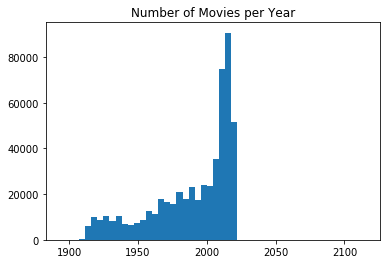

In [7]:
# Clean the df_basics dataframe
df_basics = df_basics[df_basics['titleType'] == 'movie']

df_basics=df_basics.replace('\\N',np.NaN)

# Fill years with average of closest neighbors
df_basics['startYear'] = df_basics['startYear'].interpolate(method='nearest').ffill().bfill()
df_basics[df_basics['tconst']=='tt3266366']

# Convert to int and check bin size visually
df_basics['startYear']=df_basics['startYear'].astype(int)
plt.hist(df_basics['startYear'], bins=50)
plt.title('Number of Movies per Year')

# Bin the years for later visualizations
# Lower bound is inclusive with upperbound not inclusive, rounds down
df_basics['year_decade_2'] = pd.cut(df_basics['startYear'], bins=len(range(min(df_basics['startYear']), max(df_basics['startYear']), 10)))
df_basics['year_decade_1']=df_basics['year_decade_2'].apply(lambda x: x.left)
df_basics['year_decade'] = round(df_basics['year_decade_1'].astype('int'),-1)
df_basics=df_basics.drop(columns = ['year_decade_1','year_decade_2'])

# Convert the runtime to a numeric variable.
df_basics['runtimeMinutes'] = pd.to_numeric(df_basics['runtimeMinutes'], errors='coerce')

In [8]:
# Pull out the genres and add the as dummy indicators.
# Note: the dummy columns are difficult to make since they are split by commas within one column.

# Extract the genres
df_genres = df_basics['genres'].str.split(',', expand = True)
df_genres = df_genres.values.flatten()
df_genres = list(filter(None, df_genres)) 
df_genres = np.unique(df_genres)

# Clean the words
# Remove leading whitespace 
df_genres= [s.strip() for s in df_genres] 
df_genres = np.unique(df_genres)
# Number of unique categories
# print(len(df_genres))

# Initiate empty columns for each genre.
for i in df_genres:
    df_basics[i] = 0
    
# Build the dummy indicators.
for i in df_basics.iloc[:,10:len(df_basics.columns)].columns:
    df_basics[i] = pd.np.where(df_basics['genres'].str.contains(i), 1, 0)
    
for col in df_basics.iloc[:,10:len(df_basics.columns)-1].columns:
    df_basics.loc[df_basics['nan']>0, col] = 0 

In [9]:
# Merge the data from akas and basics on the unique movie id.

df_movies = pd.merge(df_akas, df_basics, on = 'tconst')

# merge this table with the ratings data read in earlier. 
df_movies = pd.merge(df_movies, df_ratings, on = 'tconst')

#df_movies.head()
print(df_movies.shape)
print(df_movies.columns)

# save to csv with IMDB merges complete
df_movies.to_csv(path+'df_movies.csv')

(114144, 48)
Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'year_decade', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'nan',
       'averageRating', 'numVotes'],
      dtype='object')


After merging in the IMDB data together with different tables as well as with the script data, we can merge in the Bechdel Data.

In [10]:
# merge in bechdel data & save
# Note: we left join movies to bechdel to have only bechdel rated movies.
df_movies_bechdel = pd.merge(df_movies, bechdel, how = 'left', on = 'tconst')
# replace missing values
df_movies_bechdel=df_movies_bechdel.replace('\\N',np.NaN)
df_movies_bechdel.to_csv(path+'df_movies_bechdel.csv')

In [11]:
# merge in bechdel data & save
# Note: we outer join movies to bechdel to have all movies in IMDB and all the bechdel movies.
df_movies_all = pd.merge(df_movies_bechdel, char_df, how = 'outer', on = 'tconst')
df_movies_all.to_csv(path+'df_movies_all.csv')

<a id='results_cell'></a>
### Results:

<a id='first_viz_cell'></a>
#### First Visualization:

Now, we will view some preliminary descriptive visualizations.

Note: This concludes the data merging aspect of the project. Proceed to data visulaization examples.

In [12]:
# reload the new data
data_path = path + 'df_movies_all.csv'
data = pd.read_csv(data_path, encoding='latin-1', low_memory=False)

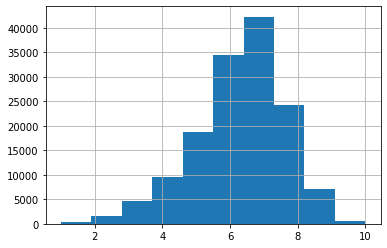

In [13]:
data['averageRating'].hist()

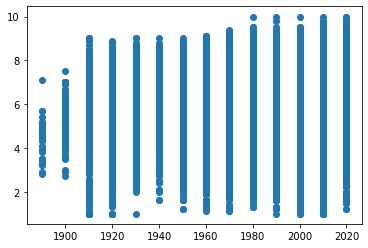

In [14]:
# select the years to compare to remove bias
plt.scatter('year_decade', 'averageRating', data=data) 

How does the score of the Bechdel Test relate to IMDB User Rating?

Text(0.5, 1.0, 'Average IMDB Rating vs. Bechdel Test Rating')

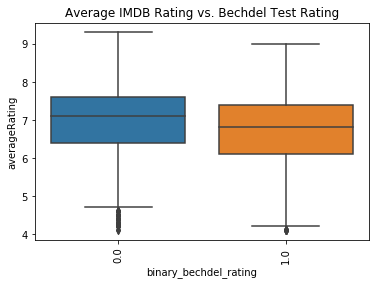

In [15]:
f = sns.boxplot(x='binary_bechdel_rating', y='averageRating', notch=False, data=data[(data['averageRating'] > 4) & (data['year_decade']>=1980)]) # 2IQR outlier
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title('Average IMDB Rating vs. Bechdel Test Rating')

How does the distribution of Bechdel passing movies change over time?

Text(0, 0.5, 'Ratio Pass')

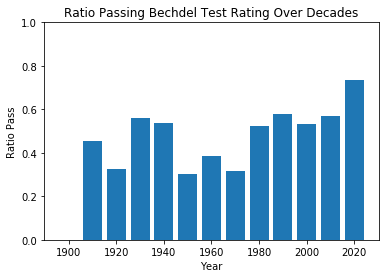

In [16]:
temp = data.groupby('year_decade').sum()/data.groupby('year_decade').count()
plt.bar(temp.index,temp['binary_bechdel_rating'], width = 8)
plt.ylim([0, 1])

plt.title('Ratio Passing Bechdel Test Rating Over Decades')
plt.xlabel('Year')
plt.ylabel('Ratio Pass')

# look at 2020 and WWII
# break down into more granular scores

How much does content play a role vs. word count? For which genres is this more prevalent?

Text(0, 0.5, 'Movie Count')

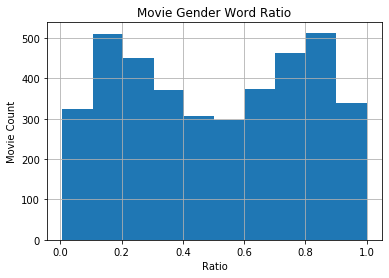

In [17]:
words_data = data[data['bechdel_rating']!= 'NaN'].groupby(['gender', 'tconst']).sum()
total_words_data = data[data['bechdel_rating']!= 'NaN'].groupby(['tconst'])['words'].sum()
gender_wordcount_data = data[data['bechdel_rating']!= 'NaN'].groupby(['tconst', 'gender'])['words'].sum()
word_ratio =  gender_wordcount_data/total_words_data

word_ratio.hist()
plt.title('Movie Gender Word Ratio')
plt.xlabel('Ratio')
plt.ylabel('Movie Count')

<a id='tableau_prep_cell'></a>
#### Tableau Data Preparation:

Now, we will clean the data for use in Tableau.

Note: This concludes the preliminary coding aspect of the project. Proceed to more data preparation for visualization in Tableau.

#### Overview Over Time:

In [18]:
# reload the new data
# data_path = path + 'df_movies_all.csv'

# data = pd.read_csv(data_path, encoding='latin-1', low_memory=False)

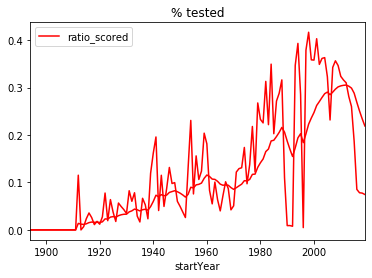

In [19]:
first_graph = pd.DataFrame(data.groupby(['startYear']).binary_bechdel_rating.count())
first_graph['total_movies_num'] = pd.DataFrame(data.groupby(['startYear']).tconst.count())
first_graph['ratio_scored'] = first_graph.binary_bechdel_rating/first_graph.total_movies_num
first_graph['year'] = first_graph.index
first_graph.plot(kind='line',x='year',y='ratio_scored',color='red')
first_graph['ratio_scored'].ewm(span = 20).mean().plot(style = 'r', title='% tested')

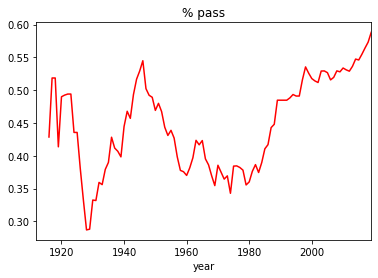

In [20]:
second_graph = pd.DataFrame(data.groupby(['binary_bechdel_rating','year']).size().reset_index(name='count'))

second_graph = second_graph.pivot(index='year', columns='binary_bechdel_rating', values='count')
second_graph['total']= second_graph.iloc[:,0] + second_graph.iloc[:,1]
second_graph['ratio_passed'] = second_graph.iloc[:,1]/second_graph['total']
second_graph['ratio_passed'].ewm(span = 20).mean().plot(style = 'r', title='% pass')

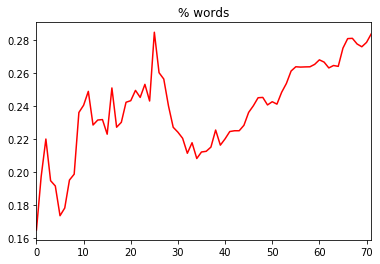

In [21]:
third_graph=pd.DataFrame(data.groupby(['gender','year']).words.sum().reset_index())
third_graph_f = third_graph[third_graph.gender == 'f']
third_graph_m = third_graph[third_graph.gender == 'm']

third_graph=pd.merge(third_graph_f,third_graph_m, on = 'year')
third_graph['total'] = third_graph['words_x']+ third_graph['words_y']
third_graph['ratio_words'] = third_graph['words_x']/third_graph['total']
third_graph['ratio_words'].ewm(span = 20).mean().plot(style = 'r', title='% words')

In [22]:
final_graph = pd.merge(first_graph, second_graph, on='year')
final_graph = pd.merge(final_graph, third_graph, on='year')
final_graph=final_graph[['year','total_movies_num','ratio_scored','ratio_passed','ratio_words']]
final_graph.to_csv(path+'final_graph.csv')

final_graph.head()

,year,total_movies_num,ratio_scored,ratio_passed,ratio_words
0,1929.0,373,0.042895,0.294118,0.164722
1,1931.0,654,0.082569,0.327273,0.226466
2,1932.0,895,0.060335,0.537037,0.259279
3,1933.0,804,0.078358,0.333333,0.132274
4,1936.0,945,0.066667,0.714286,0.181347


#### Representation by Genre:

It will also be interesting to review the data by Genre in Tableau.

For each year and genre, we would like to compute:
- number movies passed
- number movies total
- ratio passed/total

In [23]:
a = data[(data.Action == 1) & (data.binary_bechdel_rating == 1)]
passed = a.groupby('year').binary_bechdel_rating.sum()

b=data[(data.Action == 1)]
total = b.groupby('year').binary_bechdel_rating.count()

df = pd.merge(total, passed, on='year')
df['ratio_passed'] = df.iloc[:,1]/df.iloc[:,0]
df['genre'] = 'Action'
df=df.reset_index()

In [24]:
for genre in data.iloc[:,19:46].columns: 
    a = data[(data[genre] == 1) & (data.binary_bechdel_rating == 1)]
    passed = a.groupby('year').binary_bechdel_rating.sum()
    
    b=data[(data[genre] == 1)]
    total = b.groupby('year').binary_bechdel_rating.count()
    
    temp = pd.merge(total, passed, on='year')
    temp=temp.reset_index()
    temp['ratio_passed'] = temp['binary_bechdel_rating_y']/temp['binary_bechdel_rating_x']
    temp['genre'] = str(genre)
    
    df = df.append(temp)

In [25]:
df=df.rename(columns={'binary_bechdel_rating_x':'total', 'binary_bechdel_rating_y':'passed'})
df.head()
# Movies per genre
#df.groupby('genre').total.sum().sort_values() 

,year,total,passed,ratio_passed,genre
0,1918.0,1,1.0,1.000000,Action
1,1919.0,1,1.0,1.000000,Action
2,1940.0,6,3.0,0.500000,Action
3,1957.0,6,1.0,0.166667,Action
4,1960.0,2,1.0,0.500000,Action


In [26]:
df.to_csv(path+'genres_graph.csv')

<a id='disc_cell'></a>
### Discussion:

Now, the data extracted in the final part of this code will be used to build interactive dashboards in Tableau. You can view more online on our website: http://imdbgenderrepresentation.getforge.io/.

In the first dashboard, we examine the ratio of all movies that have been scored by the Bechdel test over time. Despite the upward trend, the maximum ratio is less than 40%, supporting the argument that there is a need to make the scoring process more efficient. If we are to consider the representation of women in media as reflective of perceptions of women by society, it is important that the distribution of Bechdel scores is representative of all movies.

The second dashboard compares the ratio of movies that pass the test to the proportion of words belonging to female characters, aggregated across movies over time. Without exploring the data, word-count would seem like a logical proxy to capture representation for use in an algorithmic approach. However, the results of this figure suggest otherwise. Over time, the ratio of movies passing the test has a larger slope than the ratio of female words to total words; this means that the content criterion of the Bechdel Test may play a larger role than just the word count. Using word count as a proxy for feature engineering purposes may not be the wisest decision.

Finally, the last dashboard shows the proportion of movies that pass the Bechdel test conditioned on the genre of the movie, over time. We are able to see clear trends in the proportion of passing movies when the feature is split on genre. Romance and Horror films have had the highest ratio of passing the Bechdel test since the 1980s; while Crime and Action films have had the lowest ratio of passing.

#### Conclusions:

In this descriptive exploration of data, we have begun to see how nuanced an automation methodology would need to be to accurately capture the scoring of the Bechdel test. It would be difficult to find single proxy variables for the 3 criteria of the test, and feature engineering would need to include domain knowledge. This is not to say that automation is impossible; but our takeaway is that, as Data Scientists, we are the ones who need to voice concerns about using proxies that aren’t representative, and we should include the voices of domain experts when modeling qualitative outcomes that may be subjective. 

Finding a way to automate the Bechdel test may be a difficult undertaking; however, it could help improve the measure of the true proportion of Bechdel passing films by scoring all movies in the IMDb and beyond. It is of note is that it is also not the only metric for quantifying representation in media, as it only considers one identity variable -- gender. Washington Post writer Alyssa Rosenberg claims "The Bechdel Test set a very low floor for Hollywood. We can't let it become the ceiling for progress [3]."  In the past decade, many other representation tests have been formulated, considering the distribution of people who work on the film's production, or relating other intersectional features like race, ethnicity, socioeconomic status, so that representation is inclusive to identities beyond cisgender white women. Though our analysis focuses on the Bechdel Test, our suggestions about feature engineering can help establish similar methodologies for other tests and continue to build a more equitable movie industry. 

#### References:

[1] https://bechdeltest.com/ <br/>
[2] https://bechdeltest.com/api/v1/doc <br/>
[3] https://www.washingtonpost.com/opinions/2018/12/21/its-time-move-beyond-bechdel-test/ <br/>
[4] https://projects.fivethirtyeight.com/next-bechdel/)<br/>
